In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to download files form website
import requests

#for facebook
import urllib3
import facebook 
import json
%matplotlib inline

In [4]:
token = 'EAAkW0HaDsy0BALLDnsmhB2r9w7PJk1z7QlzxZAnf7Pb2qYgsoIO8XwrbuIedDrQr4EtZC8ZCkxbWwCfnwuVverfGndZA1rw7HLZBg1CUs0jvA0Ui6Y41YA7ZCDGEWvDftDGBVJHwuAhtGw2h6GnmhZCNi0IRxaHwWG9rGgcq7XIkMH8CkYjxgcZBjZCqvnjFn5h6bm9wiZCi9thTSsdPOhDgpG92eX1ZBS6uRBBRyRZBOXe33gZDZD'
tokenapp ='2558359387747117|5Gd-HwbhAX7drjfE_PtCJoGjPLQ'

In [8]:
graph = facebook.GraphAPI(access_token=token, version=3.1)

# Get info from my facebook page
my_info = graph.get_object(id='me')
#return desired fields
print(json.dumps(my_info))

# Get the active user's friends.
friends = graph.get_connections(id='me', connection_name='groups')
print(json.dumps(friends))

# Get the comments from a post. =saca errorrrr por quéee
comments = graph.get_connections(id='2001931163286982', connection_name='comments')



# Write 'Hello, world' to the active user's wall.
#graph.put_object(parent_object='me', connection_name='feed', message='Hello, world')


{"name": "Catalina Arboleda", "id": "2114852855328145"}
{"data": [{"name": "IAU ISYA All Alumni", "id": "562229033866192"}, {"name": "ARRIENDO DE HABITACIONES, CASAS Y APT. EN MEDELLIN", "id": "1825156804384319"}, {"name": "ALQUILER DE HABITACIONES SOLO MEDELLIN PARA ESTUDIANTES", "id": "299647633378885"}, {"name": "HABITACIONES PARA UNIVERSITARIOS  Medell\u00edn", "id": "774772542585515"}, {"name": "HABITACIONES PARA UNIVERSITARIOS ALOJA Medell\u00edn", "id": "1536803166581206"}, {"name": "Trekking", "id": "1103313029681982"}, {"name": "Delegaci\u00f3n Colombia a UG M\u00e9xico", "id": "677817929030643"}, {"name": "Understanding Einstein: The Special Theory of Relativity (Coursera)", "id": "235803806558481"}, {"name": "Club Ori\u00f3n de Astronom\u00eda de Medell\u00edn", "id": "376416784920"}, {"name": "Grupo  Astro-Fisicos", "id": "197763300333452"}, {"name": "Astroparche...", "id": "177860742270896"}], "paging": {"cursors": {"before": "QVFIUjgtSDhaNVFSU1NfVHJpclY1elBBQ1l0RUt0Uk1QNX

In [9]:
def account_info(token, user_id):
    graph = facebook.GraphAPI(token)
    #fields = ['first_name','Location','email','link']
    profile = graph.get_object(id=user_id)    
    #return desired fields
    print(json.dumps(profile, indent=4))
    
    return profile
          
 

In [11]:
#account_info(token,'109552446950122')
account_info(tokenapp, '200059547026318')

GraphAPIError: (#10) This endpoint requires the 'pages_read_engagement' permission or the 'Page Public Content Access' feature. Refer to https://developers.facebook.com/docs/apps/review/login-permissions#manage-pages and https://developers.facebook.com/docs/apps/review/feature#reference-PAGES_ACCESS for details.

In [14]:
def page_info(token,page_name):
    graph = facebook.GraphAPI(token, version=2.9)
    # list of required fields
    fields = ['id','name','about','likes','link','band_members']
    fields = ','.join(fields)
    page = graph.get_object(page_name, fields=fields)
    print(json.dumps(page,indent=4))

    return page

In [15]:
page_info(token,'Coldplay')

GraphAPIError: (#100) Page Public Metadata Access requires either app secret proof or an app token

# Downloading contents from URL

In [3]:
#get the link or url
url = 'https://www.facebook.com/favicon.ico'
r = requests.get(url, allow_redirects=True)

#Save the content with name
open('dataframe.csv', 'wb').write(r.content)

1150

In [4]:
dataset = pd.read_csv('leads emaus campaña formulario de 8 al 11 junio.csv')

In [5]:
dataset.columns = ['id','created_time','ad_id','ad_name','adset_id','adset_name','campaign_id',
                   'campaign_name','form_id','form_name','is_organic',
                   'platform','caja compensación','salario (2-4SM)',
                   'situación laboral','nombre','email','phone_number']

#dataset.info()
dataset['situación laboral'].unique()
#dataset["id"].nunique()

array(['independiente', 'empleado', 'Empleado', 'si', 'no', 'contratista',
       'enpleado', 'Independiente', 'otro motivo', 'empleada',
       'soy pensionada', 'empleda', 'Quiero recibir información',
       'empleada y pensionada', 'pensionada', 'soy empleada', 'emplesdo',
       'Pensionado', 'dependiente', 'independientemente', 'independidnte'],
      dtype=object)

In [6]:
#=====================================
# Function to standarize answers
#=====================================
import unidecode

def estandarizar(string,diccionario):
    #this line convert the string with accents and mayus into lowercase and non-accent string.
    string = unidecode.unidecode(string).lower() #accented_string is of type 'unicode'

    for standar_resp in diccionario: #ciclo sobre "keys" del dicc
        for resp in diccionario[standar_resp]: 
            #diccionario[standar_resp] = valores del key ---> en este caso listas
            if resp in string:
                return standar_resp 
            
    return string

#==================================
#plotting function
#==================================

def plotting(dataframe, a,r): 
    dataframe.plot(kind='bar',figsize=(8,6))   
    plt.style.use('seaborn-dark-palette')
    plt.title(a,fontsize='15')
    plt.xlabel('¿' + dataframe.index.name + '?',fontsize='12')
    plt.ylabel('Leads',fontsize='12')
    plt.legend(loc='upper right', labels=dataframe.columns.values,fontsize='12')
    plt.grid()
    plt.xticks(rotation=r)
    plt.show()
    


In [7]:
#=======
#listas
#=======
s_respuestas_salario= ['si','sí','Dos salarios minimos','si 2', '2', 'dos',
                            '3 salario minimo','5 salarios', 'Si','de 2 a 4 salarios']

n_respuestas_salario = ['no', '1','el minimo','si menos de 2 salarios minimos',
                           '1 salario minimo','1 salario', 'un salario','el salario'
                           '1000000', 'uno','no gano', 'nada','solo uno']

s_respuestas_caja = ["si","con","com"]

n_respuestas_caja = ["no","porvenir"]


resp_empleados = ['em','enpleado']
resp_indep = ['ind','cont', 'dependiente']
resp_pen = ['ionad']
malas_respuestas = ['si','no','otro motivo', 'quiero recibir informacion']

#==============
#diccionarios
#===============
diccionario_laboral = {'empleado':resp_empleados,
                       'independiente':resp_indep,
                       'pensionado':resp_pen,
                       'no aplica':malas_respuestas} 

diccionario_caja = {'si':s_respuestas_caja,
                    'no':n_respuestas_caja} 

diccionario_salario = {'si':s_respuestas_salario,
                       'no':n_respuestas_salario} 

In [8]:

#===========================================================
#standarizing answers "tiene caja de compensación": si - no
#===========================================================

dataset["caja compensación"]=\
dataset["caja compensación"].apply(lambda x: estandarizar(x, diccionario_caja))

#=========================================
#standarizing answer: salario minimo 2-4
#=========================================


dataset["salario (2-4SM)"] = \
dataset["salario (2-4SM)"].apply(lambda x: estandarizar(x,diccionario_salario))

#==========================================================
#standarizing answer: empleado - independiente - pensiondo
#==========================================================

dataset["situación laboral"] = \
dataset["situación laboral"].apply(lambda x: estandarizar(x,diccionario_laboral))


print(dataset['caja compensación'].unique(), end =" ")
print(dataset['situación laboral'].unique(), end =" ")
print(dataset['salario (2-4SM)'].unique())

#número de afiliados a caja de compensación
print(dataset[dataset['caja compensación']=='si']['id'].nunique(),end =" ")

#número de empleados
print(dataset[dataset['situación laboral']=='empleado']['id'].nunique(),end =" ")

#número de leads que satisfacen 
print(dataset[dataset['salario (2-4SM)']=='si']['id'].nunique())

['no' 'si'] ['independiente' 'empleado' 'no aplica' 'pensionado'] ['no' 'si']
125 123 76


# Write new files with filter DataFrame

In [9]:
#=========================================================
#afiliados a caja de compensación y con salario entre 2-4
#=========================================================

leads = dataset[(dataset['caja compensación']=='si') & (dataset['salario (2-4SM)']=='si')]

#================================================================================
#empleados o pensionados, afiliados a caja de compensación, con salario entre 2-4
#================================================================================

ideal_leads = leads[(leads['situación laboral'] == 'empleado') | (leads['situación laboral'] == 'pensionado')]

#=======================================================================
#independientes, afiliados a caja de compensación, con salario entre 2-4
#=======================================================================

indp_leads = leads[(leads['situación laboral'] == 'independiente')]

#================================
#write dataframes into csv files
#================================

ideal_leads.to_csv('ideal_leads.csv')

print(ideal_leads.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 2 to 160
Data columns (total 18 columns):
id                   49 non-null int64
created_time         49 non-null object
ad_id                49 non-null int64
ad_name              49 non-null object
adset_id             49 non-null int64
adset_name           49 non-null object
campaign_id          49 non-null int64
campaign_name        49 non-null object
form_id              49 non-null int64
form_name            49 non-null object
is_organic           49 non-null bool
platform             49 non-null object
caja compensación    49 non-null object
salario (2-4SM)      49 non-null object
situación laboral    49 non-null object
nombre               49 non-null object
email                49 non-null object
phone_number         49 non-null int64
dtypes: bool(1), int64(6), object(11)
memory usage: 6.9+ KB
None


# Analysis 

In [355]:
dataset = dataset[['id','created_time','caja compensación','salario (2-4SM)',
                   'situación laboral','nombre','email','phone_number']]

#dataset.set_index('id',drop=True)

In [356]:
#dataset.pivot(index='caja compensación', columns='salario (2-4SM)', values='situación laboral')
#dataset.pivot(columns='situación laboral', values='salario (2-4SM)')
#dataset.pivot_table(index='situación laboral',columns='caja compensación', values='salario (2-4SM)')

dataset['created_time'] = pd.to_datetime(dataset['created_time'])
dataset['date of creation'] = dataset['created_time'].dt.date 


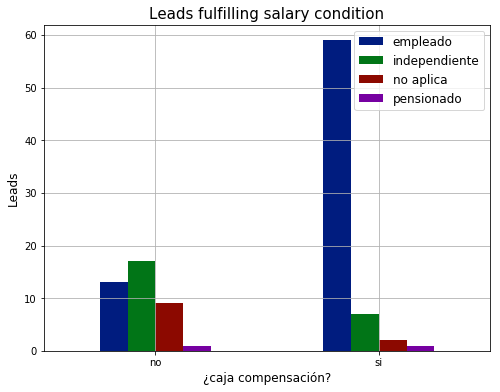

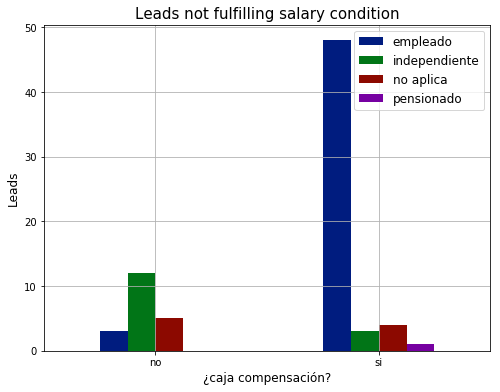

In [357]:
#=============================================================
#dataset fullfilling salary condition, then
#group by situación laboral & caja and count 
#=============================================================

dataset_leads = dataset[dataset['salario (2-4SM)'] == 'si'].\
                groupby(['caja compensación','situación laboral'])['id'].count()
    
#=============================================================
#dataset not fullfilling salary condition, then
#group by situación laboral & caja and count
#=============================================================

data_leads_nosalary = dataset[dataset['salario (2-4SM)'] == 'no'].\
                groupby(['caja compensación','situación laboral'])['id'].count()

#========================================================
#converting to dataframe and unstack by situación laboral
#========================================================

dataset_leads =pd.DataFrame(dataset_leads.unstack(level=1))
data_leads_nosalary =pd.DataFrame(data_leads_nosalary.unstack(level=1))


#=====================
#plotting results
#=====================

plotting(data_leads_nosalary, 'Leads fulfilling salary condition',0)
plotting(dataset_leads, 'Leads not fulfilling salary condition',0)


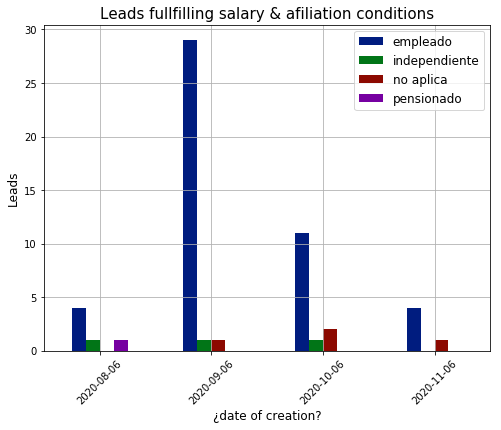

In [359]:
#=============================================================
#dataset fullfilling condition of salary and caja compensación
# by date
#=============================================================

salary_caja = dataset[(dataset['salario (2-4SM)'] == 'si')& (dataset['caja compensación'] == 'si')].\
                groupby(['date of creation','situación laboral'])['id'].count()

salary_caja = pd.DataFrame(salary_caja.unstack(level=1))

plotting(salary_caja,'Leads fullfilling salary & afiliation conditions',45)